In [2]:
# Python_version 2.7.15

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
%matplotlib inline
import octopus as oct

In [23]:
# Import Data

R24E09_Ftrace_mean = np.load('R24E09_Ftrace_mean.npy')
R24E09_ArcLight_MOI = np.load('R24E09_MOI.npy')
R24E09_ArcLight_LDir = np.load('R24E09_LDir.npy')
R24E09_R_deg = np.load('R24E09_R_deg.npy')

R20D01_Ftrace_mean = np.load('R20D01_Ftrace_mean.npy')
R20D01_ArcLight_MOI = np.load('R20D01_MOI.npy')
R20D01_ArcLight_LDir = np.load('R20D01_LDir.npy')
R20D01_R_deg = np.load('R20D01_R_deg.npy')

R38G02_Ftrace_mean = np.load('R38G02_Ftrace_mean.npy')
R38G02_ArcLight_MOI = np.load('R38G02_MOI.npy')
R38G02_ArcLight_LDir = np.load('R38G02_LDir.npy')
R38G02_R_deg = np.load('R38G02_R_deg.npy')

SplitT4c_Ftrace_mean = np.load('SplitT4c_Ftrace_mean.npy')
SplitT4c_ArcLight_MOI = np.load('SplitT4c_MOI.npy')
SplitT4c_ArcLight_LDir = np.load('SplitT4c_LDir.npy')
SplitT4c_R_deg = np.load('SplitT4c_R_deg.npy')

rotations = [0,45,90,135,180,225,270,315,360]

slope: -0.974543 intercept: 0.000114 r_value : -0.995686


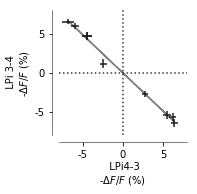

In [21]:
slope, intercept, r_value, p_value, std_err = \
    scipy.stats.linregress(np.mean(R38G02_Ftrace_mean,1), np.mean(R20D01_Ftrace_mean,1))
print("slope: %f intercept: %f r_value : %f" % (slope, intercept, r_value))

fig = plt.figure(figsize = (2.3, 2.3))
ax = fig.add_subplot(111)

plt.errorbar(np.mean(R38G02_Ftrace_mean,1), np.mean(R20D01_Ftrace_mean,1),
             xerr = stats.sem(R38G02_Ftrace_mean,1), yerr = stats.sem(R20D01_Ftrace_mean,1), fmt='none', color = '0.1')
plt.plot(np.mean(R38G02_Ftrace_mean,1),\
         intercept + slope*(np.mean(R38G02_Ftrace_mean,1)), color = '0.5', LineWidth = '1.5', zorder=0)

ax.axhline(y=0, color='0.2', linestyle=':')
ax.axvline(x=0, color='0.2', linestyle=':')
ax.set_ylabel('  LPi 3-4 \n-$\Delta F/F$ (%)', size=10)
ax.set_xlabel('  LPi4-3 \n-$\Delta F/F$ (%)', size=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
yticks = np.array([-0.05,0,0.05,0.1])
ax.set_yticks(yticks)
ax.set_yticklabels(('-5','0','5','10'), size=10)
xticks = np.array([-0.05,0,0.05,0.1])
ax.set_xticks(xticks)
ax.set_xticklabels(('-5','0','5','10'), size=10)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.xlim([-0.08,0.08])
plt.ylim([-0.08,0.08])

#plt.tight_layout()
#plt.savefig('Fig1_R20D01_R38G02_Regression.pdf',bbox_inches='tight', dpi=600, transparent=True)
plt.show()

In [27]:
p_value

1.728869090460403e-08

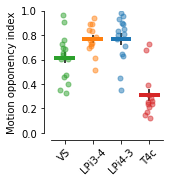

In [24]:
# Make Scatter Plot of MOI

pos = [0,1,2,3]

fig = plt.figure(figsize = (0.5*len(pos), 2.25))

#plt.subplots_adjust(wspace = 0.5)
ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R24E09_ArcLight_MOI, R20D01_ArcLight_MOI, R38G02_ArcLight_MOI, SplitT4c_ArcLight_MOI]
colors = ['C2', 'C1', 'C0', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('VS',' LPi3-4', ' LPi4-3', 'T4c'), rotation=45, size=10)
ax.set_ylabel('Motion opponency index', size=10)
plt.ylim([0,1])
ax.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('Fig1_R24E09_R20D01_R38G02_MOI.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

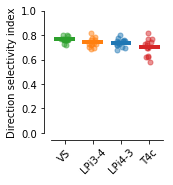

In [25]:
# Make Scatter Plot of LDir

pos = [0,1,2,3]

fig = plt.figure(figsize = (0.5*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [R24E09_ArcLight_LDir, R20D01_ArcLight_LDir, R38G02_ArcLight_LDir, SplitT4c_ArcLight_LDir]
colors = ['C2', 'C1', 'C0', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[np.mean(data[j]),np.mean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],np.mean(data[j]),yerr=[stats.sem(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('VS',' LPi3-4', ' LPi4-3', 'T4c'), rotation=45, size=10)
ax.set_ylabel('Direction selectivity index', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([0,1])

bbox_inches = 'tight'
#plt.savefig('Fig1_R24E09_R20D01_R38G02_LDir.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

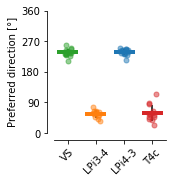

In [26]:
# Make Scatter Plot of R_deg

pos = [0,1,2,3]

fig = plt.figure(figsize = (0.5*len(pos), 2.25))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [np.radians(R24E09_R_deg), np.radians(R20D01_R_deg), np.radians(R38G02_R_deg), np.radians(SplitT4c_R_deg)]
colors = ['C2', 'C1', 'C0', 'C3']

ax.axhline(y=0,xmin=0.0001,xmax=0.9999, color='0.05', linestyle=':', linewidth = 1)

for j in range (len(data)):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[stats.circmean(data[j]),stats.circmean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],stats.circmean(data[j]),yerr=[stats.circstd(data[j])], color='k',zorder = 0)    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('VS',' LPi3-4', ' LPi4-3', 'T4c'), rotation=45, size=10)
ax.set_yticks(np.radians(rotations[::2]))
ax.set_yticklabels(rotations[::2])
ax.set_ylabel(u'Preferred direction [°]', size=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.ylim([0,np.pi*2])

bbox_inches = 'tight'
#plt.savefig('Fig1_R24E09_R20D01_R38G02_SplitT4c_R_deg.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()